In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv("data.csv")


In [5]:
df.dropna(subset=['MSRP'], inplace=True)
df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0], inplace=True)
df['Engine HP'].fillna(df['Engine HP'].mean(), inplace=True)
df['Engine Cylinders'].fillna(df['Engine Cylinders'].mean(), inplace=True)
df['Number of Doors'].fillna(df['Number of Doors'].mode()[0], inplace=True)
df['Market Category'].fillna("Unknown", inplace=True)

print("\n📄 Dataset loaded and cleaned.")
print("Shape:", df.shape)


📄 Dataset loaded and cleaned.
Shape: (11914, 16)


C:\Users\hyper\AppData\Local\Temp\ipykernel_21548\1487681596.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0], inplace=True)
C:\Users\hyper\AppData\Local\Temp\ipykernel_21548\1487681596.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

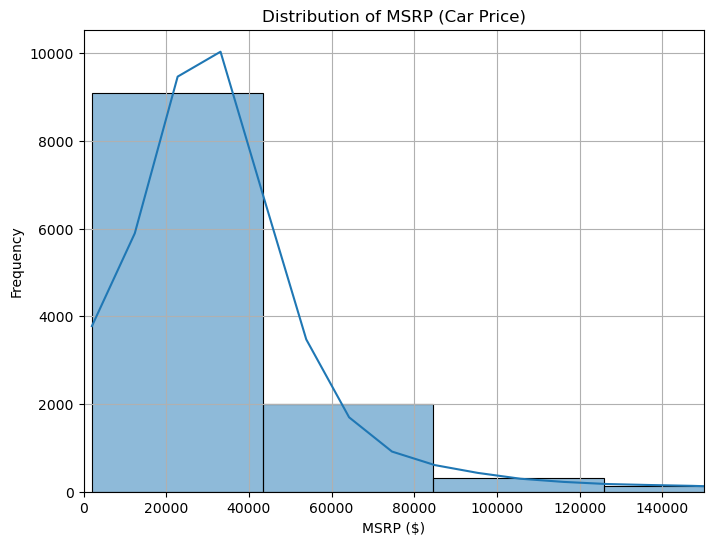

In [50]:
plt.figure(figsize=(8,6))
sns.histplot(df['MSRP'], bins=50, kde=True)
plt.title("Distribution of MSRP (Car Price)")
plt.xlabel("MSRP ($)")
plt.ylabel("Frequency")
plt.xlim(0, 150000)
plt.grid()
pdf.savefig()
plt.show()

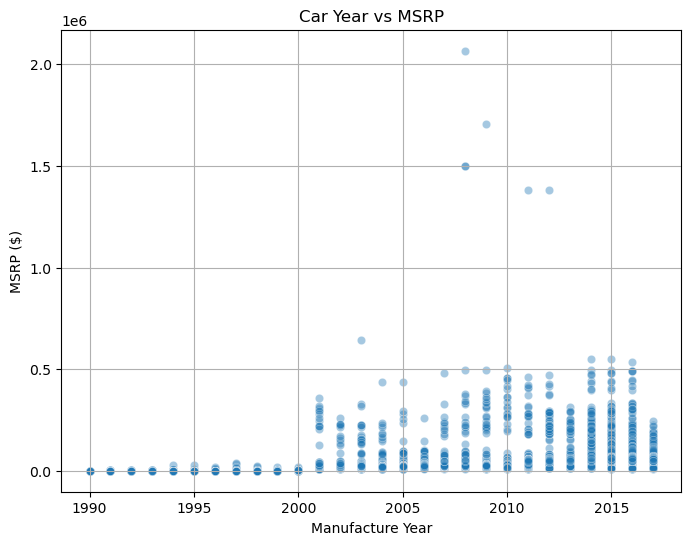

In [52]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Year', y='MSRP', data=df, alpha=0.4)
plt.title("Car Year vs MSRP")
plt.xlabel("Manufacture Year")
plt.ylabel("MSRP ($)")
plt.grid()
pdf.savefig()
plt.show()

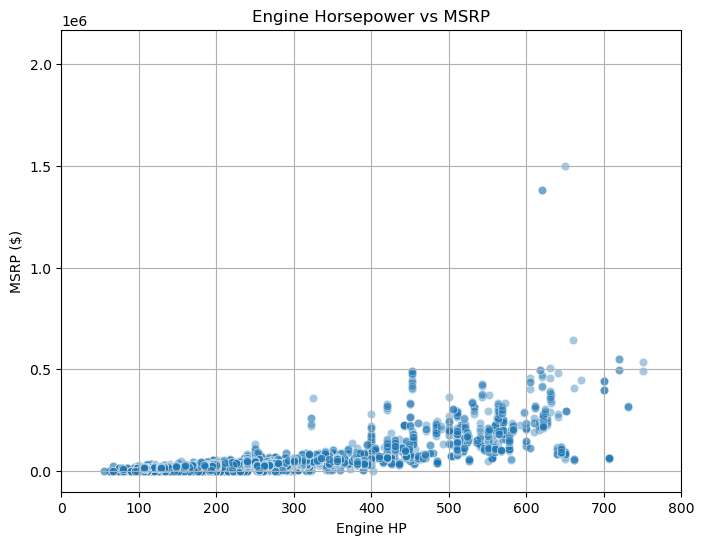

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Engine HP', y='MSRP', data=df, alpha=0.4)
plt.title("Engine Horsepower vs MSRP")
plt.xlabel("Engine HP")
plt.ylabel("MSRP ($)")
plt.xlim(0, 800)
plt.grid()
pdf.savefig()
plt.show()

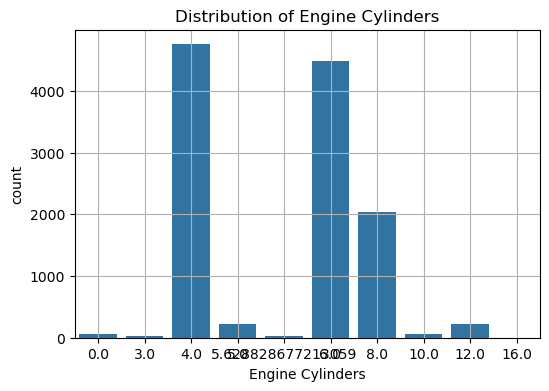

In [56]:
plt.figure(figsize=(6,4))
sns.countplot(x='Engine Cylinders', data=df)
plt.title("Distribution of Engine Cylinders")
plt.grid()
pdf.savefig()
plt.show()

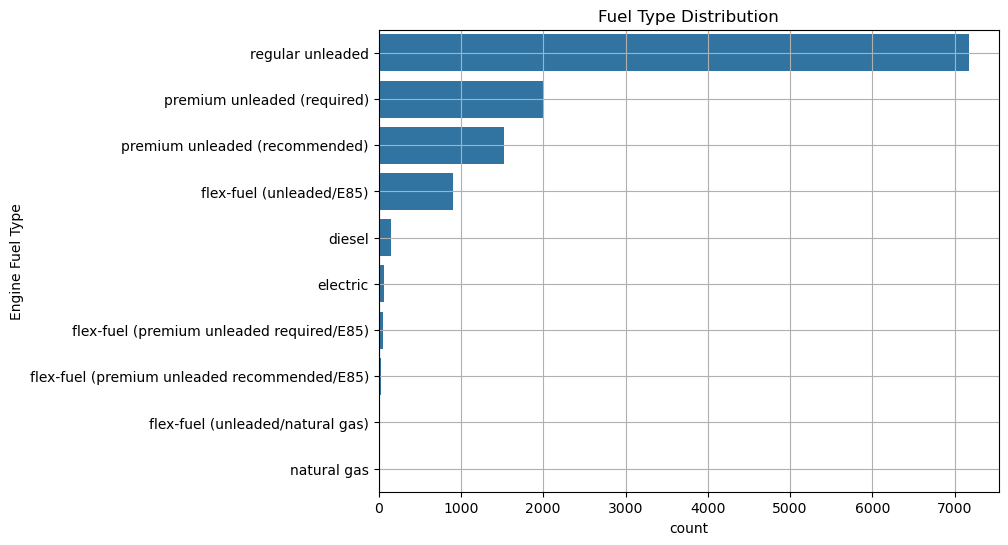

In [58]:
plt.figure(figsize=(8,6))
sns.countplot(y='Engine Fuel Type', data=df, order=df['Engine Fuel Type'].value_counts().index)
plt.title("Fuel Type Distribution")
plt.grid()
pdf.savefig()
plt.show()


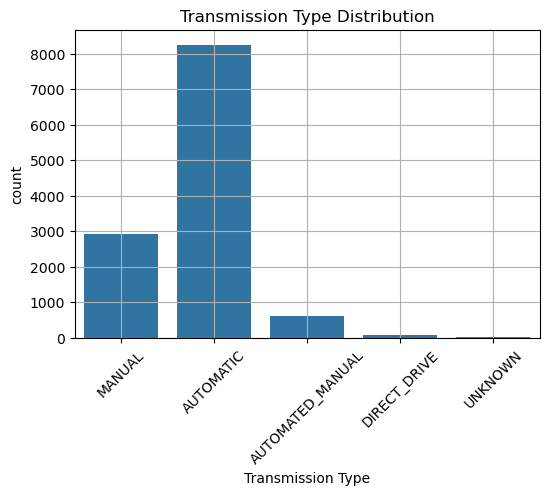

In [60]:
plt.figure(figsize=(6,4))
sns.countplot(x='Transmission Type', data=df)
plt.title("Transmission Type Distribution")
plt.xticks(rotation=45)
plt.grid()
pdf.savefig()
plt.show()

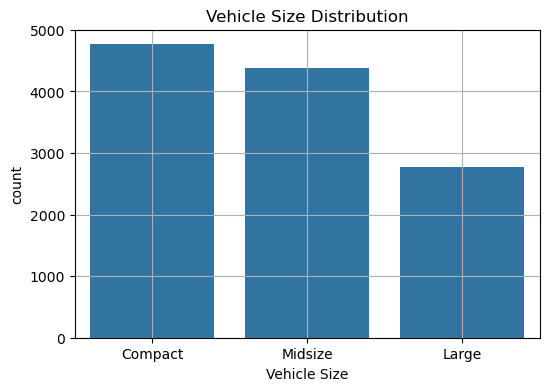

In [62]:
plt.figure(figsize=(6,4))
sns.countplot(x='Vehicle Size', data=df)
plt.title("Vehicle Size Distribution")
plt.grid()
pdf.savefig()
plt.show()

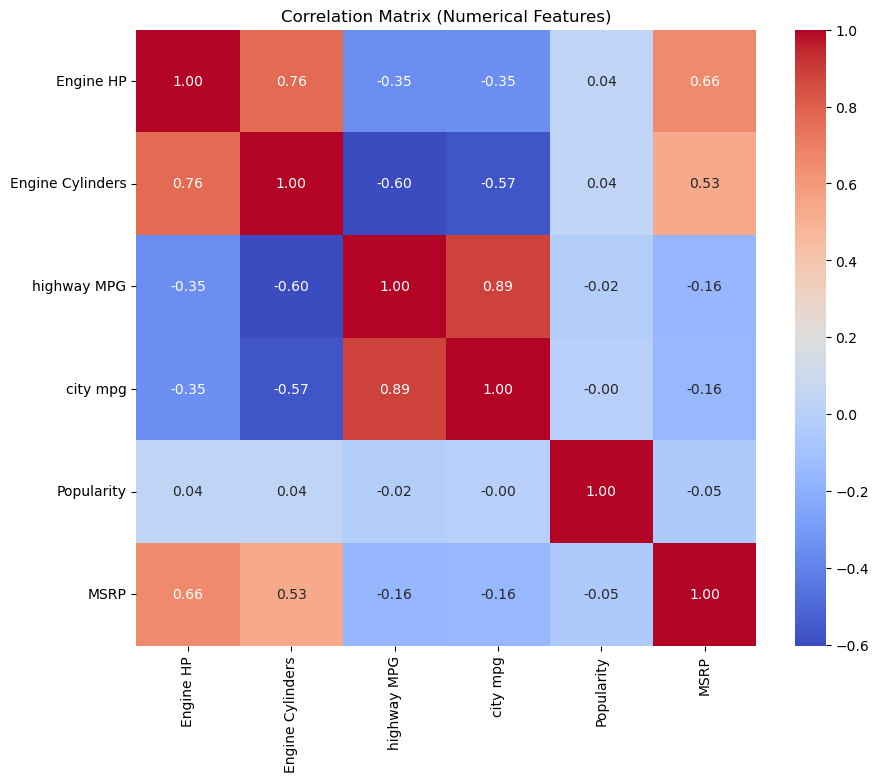

In [46]:
plt.figure(figsize=(10,8))
corr_matrix = df[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Numerical Features)")
pdf.savefig()
plt.show()


In [27]:
features = [
    'Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders',
    'Transmission Type', 'Driven_Wheels', 'Number of Doors',
    'Vehicle Size', 'Vehicle Style', 'highway MPG', 'city mpg', 'Popularity'
]
target = 'MSRP'

X = df[features].copy()
y = df[target]

In [29]:
make_model_map = df.groupby('Make')['Model'].unique().to_dict()
os.makedirs("msrp_model", exist_ok=True)
joblib.dump(make_model_map, "msrp_model/make_model_map.pkl")

['msrp_model/make_model_map.pkl']

In [31]:
label_encoders = {}
for column in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [37]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [39]:
print("\n📊 Model Evaluation:")
print("MAE :", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²  :", round(r2, 4))


📊 Model Evaluation:
MAE : 3044.95
RMSE: 6783.65
R²  : 0.9807
